### Check Residual Normality using KDE

In [3]:
x=cars$speed
y=cars$dist
L=lm(y~x)

In [28]:
options(repr.plot.width=5, repr.plot.height=4)

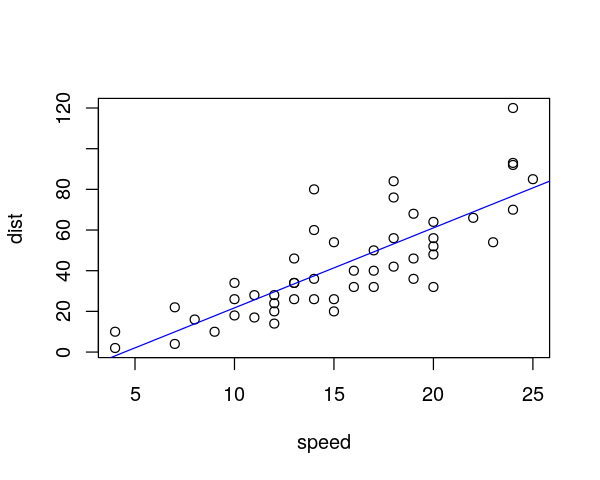

In [31]:
plot(cars)
abline(L, col='blue')

In [33]:
R  <- residuals(L)
summary(R)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-29.069  -9.525  -2.272   0.000   9.215  43.201 

In [34]:
u = seq(from=min(R), to=max(R), length =100)

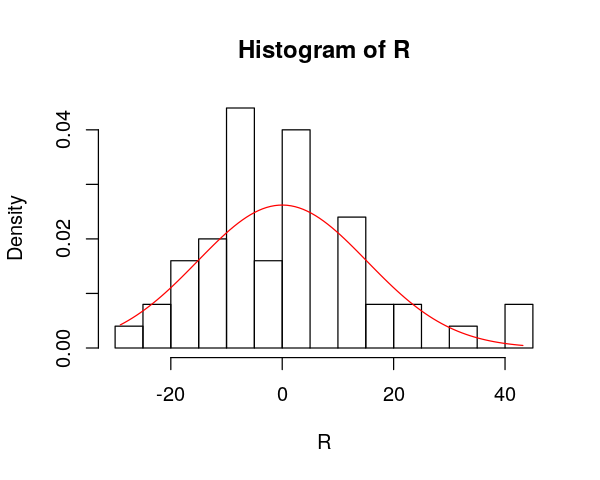

In [35]:
hist(R,breaks=20, freq=F)
lines(u, dnorm(u, mean=mean(R), sd=sd(R)), col='red')

### Choosing bandwidth that approximates normal distribution best

$1/n\sum^n_{i=1}(\hat{p}_K(u_i)-\hat{p}_N(u_i))^2 \to \min_K$ 

In [36]:
band = c("nrd", "nrd0", "ucv", "bcv", "SJ")
err_list <- c()
for (i in 1:5) {
    D = density(R, bw = band[i])
    err_list <- c(err_list, mean((D$y - dnorm(D$x, mean = mean(R), sd = sd(R)))^2))
}
err_list

Warning message in bw.ucv(x):
“minimum occurred at one end of the range”

[1] 4.906491e-06 6.520818e-06 3.804897e-06 3.981954e-06 5.447844e-06

Warning message in bw.ucv(x):
“minimum occurred at one end of the range”

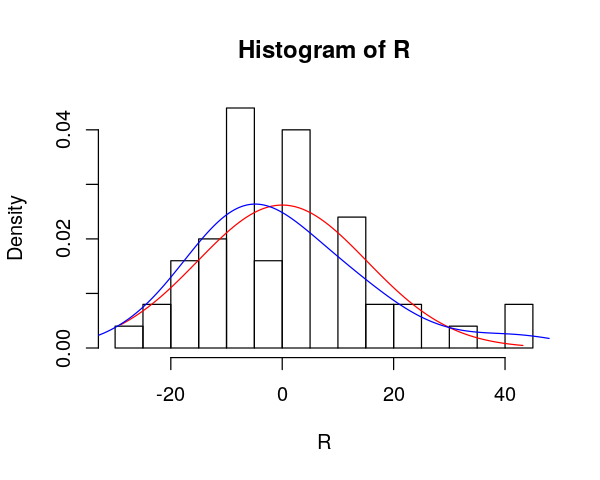

In [59]:
hist(R,breaks=20, freq=F)
lines(u, dnorm(u, mean=mean(R), sd=sd(R)), col='red')
D = density(R,bw=band[3])
lines(D,col="blue")

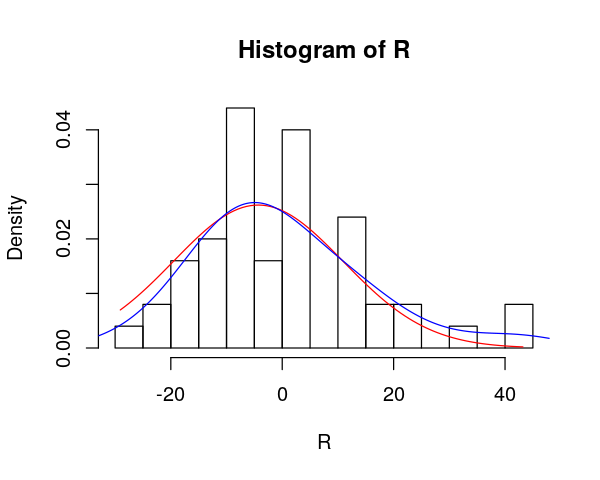

In [62]:
hist(R,breaks=20, freq=F)
lines(u, dnorm(u, mean=-4.3, sd=sd(R)), col='red')
D = density(R,bw=band[4])
lines(D,col="blue")

In [25]:
library(tsoutliers)

In [27]:
JarqueBera.test(R)


	Jarque Bera Test

data:  R
X-squared = 8.1888, df = 2, p-value = 0.01667


	Skewness

data:  R
statistic = 0.88505, p-value = 0.01062


	Kurtosis

data:  R
statistic = 3.8929, p-value = 0.1974
